## Question: 2) What is the percentage of survived / died passengers with respect to different age groups (child, teen, young, audult, oldsters) and passenger embarked station?

While creating the dataframe I have kept Survived, Pclass, Sex, Age, Fare, Embarked column from original csv file. Here also I have used '.map' function in order to label four columns values to new names and then printed the dataframe. While analysing this question I have carried out the data wrangling. Here I have used dropna() function, in order to drop the row which is having 'Nun' value. Hence in the previous question I have carried out the analysis for 981 passenger while in this case only 712 entries are there.

In [1]:
# Descriptive labelling Step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic_df = pd.read_csv('Titanic.csv')

titanic_df['Survival'] = titanic_df.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic_df['Class'] = titanic_df.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

In [2]:
titanic_df = pd.read_csv('Titanic.csv')

In [3]:
titanic_df = titanic_df.drop(titanic_df.columns[[0,3,6,7,8,10]], axis=1)
titanic_df = titanic_df.dropna()
titanic_df['Survival'] = titanic_df.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic_df['Class'] = titanic_df.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
titanic_df['Station'] = titanic_df.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
titanic_df['Age_Group'] = pd.cut(titanic_df.Age, [0, 10, 19, 29, 59, 80], labels = ['Child', 'Teenager', 'Young', 'Adult', 'Oldsters']).astype(object)
titanic_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Survival,Class,Station,Age_Group
0,0,3,male,22.0,7.2500,S,Died,Third Class,Southampton,Young
1,1,1,female,38.0,71.2833,C,Survived,First Class,Cherbourg,Adult
2,1,3,female,26.0,7.9250,S,Survived,Third Class,Southampton,Young
3,1,1,female,35.0,53.1000,S,Survived,First Class,Southampton,Adult
4,0,3,male,35.0,8.0500,S,Died,Third Class,Southampton,Adult
6,0,1,male,54.0,51.8625,S,Died,First Class,Southampton,Adult
7,0,3,male,2.0,21.0750,S,Died,Third Class,Southampton,Child
8,1,3,female,27.0,11.1333,S,Survived,Third Class,Southampton,Young
9,1,2,female,14.0,30.0708,C,Survived,Second Class,Cherbourg,Teenager
10,1,3,female,4.0,16.7000,S,Survived,Third Class,Southampton,Child


In [4]:
def percentage(value):
    return (value/float(value[-1]))*100
station_survival = pd.crosstab([titanic_df.Survival], titanic_df.Station, margins=True).apply(percentage, axis=1)
station_survival

Station,Cherbourg,Queenstown,Southampton,All
Survival,,,,
Died,12.028302,4.716981,83.254717,100.0
Survived,27.430556,2.777778,69.791667,100.0
All,18.258427,3.932584,77.808989,100.0


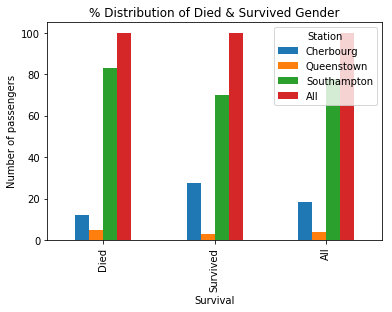

In [5]:
df = pd.Series(station_survival.plot(kind='bar'))
plt.ylabel('Number of passengers')
plt.title('% Distribution of Died & Survived Gender')
 
plt.show()

I have defined percentage function and used it with crosstab function of the dataframe. here I have found out the percentage survivals from three different embarked places and I have plotted the line graph for the same. Out of overall survivals from all stations, percentage survival rate for Southumpton is 69.79. As more number of passengers are embarked from Southampton, the percentage survival rate and died rate for Southampton is more when campared with other two stations. Also it can be seen that, only 3.93 percent passengers are embarked from Queenstown.

In [6]:
agegroup_station_survivals = pd.crosstab([titanic_df.Age_Group,titanic_df.Survival], titanic_df.Station, margins=True)
agegroup_station_survivals

Station             Cherbourg  Queenstown  Southampton  All
Age_Group Survival                                         
Adult     Died             25           9          143  177
          Survived         33           2           91  126
Child     Died              1           4           21   26
          Survived          8           0           30   38
Oldsters  Died              3           2           14   19
          Survived          2           0            4    6
Teenager  Died              7           2           50   59
          Survived         13           4           24   41
Young     Died             15           3          125  143
          Survived         23           2           52   77
All                       130          28          554  712

In [7]:
agegroup_survival = pd.crosstab([titanic_df.Age_Group, titanic_df.Survival], titanic_df.Station)
agegroup_survival

Station             Cherbourg  Queenstown  Southampton
Age_Group Survival                                    
Adult     Died             25           9          143
          Survived         33           2           91
Child     Died              1           4           21
          Survived          8           0           30
Oldsters  Died              3           2           14
          Survived          2           0            4
Teenager  Died              7           2           50
          Survived         13           4           24
Young     Died             15           3          125
          Survived         23           2           52

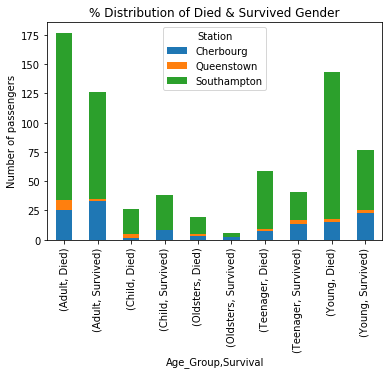

In [8]:
df = pd.Series(agegroup_survival.plot.bar(stacked=True))
plt.ylabel('Number of passengers')
plt.title('% Distribution of Died & Survived Gender')
 
plt.show()

### Conclusion - Question 2

554 passengers are from southumpton. Out of total number of adults 126 adults were suvived. But for oldsters only 6 survived out of 25. The survival rate for oldster is less. Due to old age oldsters wouldn't survived themself. Also in case of child, survival rate is more than that of died rate. Due to less age most of the child are carried by the female. Hence child got more chance to survive. For all the age groups survival rate is more for the Cherbourg station.